# [ PART 03. 통계분석 ] - 4장. 분산분석 (ANOVA)

## 1. 일원배치 분산분석

### 1.2. one-way ANOVA
< 가설 설정 - ANOVA >
- 귀무가설(H0) : 세 가지 종의 Sepal.Width의 평균은 같다.
- 대립가설(H1) : 적어도 하나 이상의 종에 대한 Sepal.Width의 평균값에는 차이가 있다.

< 유의수준은 0.05 로 설정 >

In [1]:
## 1) 분산분석

# 분산분석 결과를 result 변수에 저장
result<-aov(Sepal.Width~Species, data=iris)

# 분산분석표 확인
summary(result)   

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### 1.3. 사후 검정

In [2]:
## 2) 사후분석

# 사후분석 수행
TukeyHSD(aov(Sepal.Width~Species, data=iris))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


## 2. 이원배치 분산분석

In [3]:
## 1) 데이터 확인 및 전처리
data("mtcars")
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [4]:
# aov함수를 사용하기 위해 독립변수인 cyl, am를 팩터형으로 변환
mtcars$cyl<-as.factor(mtcars$cyl)
mtcars$am<-as.factor(mtcars$am)

# cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성 
car<-mtcars[,c("cyl","am","mpg")]
str(car)

'data.frame':	32 obs. of  3 variables:
 $ cyl: Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ am : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ mpg: num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...


### 2.2. two-way ANOVA

< 가설 설정 - ANOVA >

1. 주효과 검정에 대한 가설  
a. 귀무가설(H0) : 실린더 개수에 따른 주행거리 차이는 존재하지 않는다.  
a. 대립가설(H1) : 실린더 개수에 따른 주행거리 차이가 존재한다.  
b. 귀무가설(H0) : 변속기 종류에 따른 주행거리 차이는 존재하지 않는다.  
b. 대립가설(H1) : 변속기 종류에 따른 주행거리 차이가 존재한다.

2) 상호작용효과 검정에 대한 가설
- 귀무가설(H0) : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.
- 대립가설(H1) : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.

< 유의수준은 0.05 로 설정 >

In [5]:
## 2) 분산분석 수행
car_aov<-aov(mpg~cyl*am, car)
summary(car_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4  44.852 3.73e-09 ***
am           1   36.8    36.8   3.999   0.0561 .  
cyl:am       2   25.4    12.7   1.383   0.2686    
Residuals   26  239.1     9.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### 2.3.3. 상호작용효과 그래프

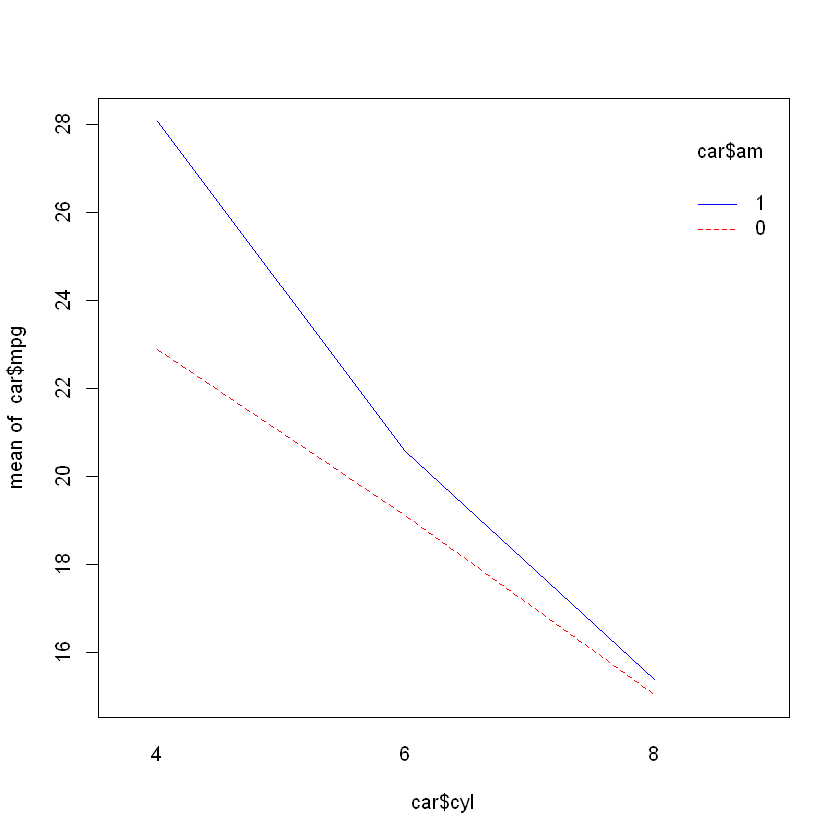

In [6]:
interaction.plot(car$cyl, car$am, car$mpg, col=c("red", "blue"))